# Primeira prova de Simulação Discreta

**Alunos:**

Camilo Henrique Martins dos Santos - 202004940027

Eude Monteiro da Hora - 202004940004

## Módulos e conjunto de dados utilizados

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sp
import statistics as st
import pandas as pd
import numpy as np

In [2]:
data = [64, 67, 94, 89, 119, 70, 81, 104, 89, 61, 93, 79, 84,
        76, 58, 84, 99, 83, 111, 87, 72, 104, 55, 76, 102, 100,
        88, 86, 75, 89, 92, 67, 99, 86, 116, 60, 46, 110, 104,
        87, 104, 68, 88, 94, 48, 99, 91, 88, 99, 57, 78, 65,
        74, 82, 79, 115, 71, 54, 114, 93, 96, 60, 111, 104, 114,
        78, 127, 60, 82, 131, 71, 111, 101, 120, 91, 84, 80, 113,
        87, 104, 81, 134, 71, 112, 74, 66, 69, 83, 90, 79, 98,
        88, 124, 47, 97, 108, 78, 104, 49, 122, 101, 91, 75, 45,
        91, 89, 88, 78, 84, 102, 72, 78, 92, 116, 79, 103, 65,
        101, 29, 87, 71, 127, 230, 94, 79, 80, 75, 74, 88, 27,
        50, 86, 87, 77, 114, 95, 77, 87, 96, 101, 78, 105, 58,
        70, 70, 99, 62, 81, 93, 87, 87, 90, 87, 82, 117, 68,
        72, 118, 95, 127, 106, 88, 81, 109, 104, 108, 114, 96, 94,
        111, 69, 108, 101, 55, 92, 89, 84, 38, 54, 55, 79, 77,
        127, 79, 49, 62, 104, 88, 59, 84, 126, 54, 101, 79, 79,
        100, 89, 100, 70, 85, 54, 315]

## Funções Utilizadas

### determine_outliers( ):

Função responsável por calcular quartis, amplitude interquartil e retornar listas de outliers moderados e extremos de um conjunto de dados.

Para a determinação de outlier, foi utilizada a seguinte lógica condicional (considere $d$ um dado numérico do conjunto, e $Q_{n}$ um quartil qualquer, para $n\in\{1,2,3\}$):

Se $d < Q_{1} - 1.5A$ ou $d > Q_{2} + 1.5A$, então $d$ é um *outlier* moderado

Se $d < Q_{1} - 3A$ ou $d > Q_{2} + 3A$, então $d$ é um *outlier* extremo

onde $Q_{1}$ e $Q_{3}$ são os quartis 1 e 3 respectivamente, e $A$ é a amplitude interquartil.

In [3]:
def determine_outliers(data: list):
    '''
    Função responsável por calcular quartis, amplitude interquartil e 
    retornar listas de outliers moderados e extremos de um conjunto de dados.
    '''
    x = sorted(data)

    Q = st.quantiles(x)
    A = Q[2] - Q[0]

    print(f"Quartis:\n{Q}\n")
    print(f"Amplitude interquartil: {A}\n")

    data_copy = data.copy()

    moderado = []
    extremo = []

    for i in data:
        if (i < Q[0]-1.5*A) or (i > Q[2]+1.5*A):
            moderado.append(i)

        if (i < Q[0]-3*A) or (i > Q[2]+3*A):
            extremo.append(i)

    print(f"{len(moderado)} outlier(s) moderado(s):\n{moderado}\n"\
    "\n{len(extremo)} outlier(s) extremo(s):\n{extremo}")

    return moderado, extremo

### histograma():

Função responsável por plotar o boxplot e histograma de um conjunto de dados, informando também o: 

* Número de classes

* Tamanho do intervalo entre classes

* Tamanho das classes

* Intervalos das classes

In [4]:
def histograma(data: list, show_extra=False):
    '''
    Função responsável por plotar o boxplot e histograma de 
    um conjunto de dados, informando também o:

    -Número de classes
    -Tamanho do intervalo entre classes
    -Tamanho das classes
    -Intervalos das classes
    '''
    plt.figure(figsize=(6,6))
    plt.title('Boxplot sem outliers extremos', fontsize='large')
    plt.boxplot(data)
    plt.grid(linestyle='--', zorder=-5)
    plt.xticks([], [])
    plt.show()
    print()
    
    k = round(1 + 3.3*np.log10(len(data)))

    h = (max(data)-min(data)) / k
    
    plt.figure(figsize=(6,6))
    plt.grid(linestyle='--',zorder=-5)
    plt.hist(data, bins=k,edgecolor="black")
    plt.title(f'Histograma com {k} classes',fontsize='large')
    plt.show()
    
    
    print('Número de classes:',k)
    print('Tamanho do intervalo:',h)
    
    if show_extra:
        c,b=np.histogram(data)
        print("Tamanho das classes: ", c.tolist())
        print("Intervalos:", b.tolist())

### KS():

Função responsável por executar o teste de aderência pelo método KS. 

Recebe como parâmetro: os dados a serem analisados e o nome da função de
distribuição a ser utilizada.

Retorna um objeto pandas.DataFrame contendo todas as informações da análise feita.

Calcula todas as colunas necessárias (de Valor Observado até a coluna de diferença D) utilizando a biblioteca Pandas e funções de Densidade de
Probabilidade.

In [5]:
def KS(data: list, func = None):
    df = pd.DataFrame()

    list_ = data.copy()

    sum = 0
    FAO = []
    FAON = []
    s_data = sorted(list_)
    size = len(list_)

    VO = list(dict.fromkeys(s_data))
    FO = pd.Series(s_data).value_counts().sort_index(ascending=True).tolist()

    for i in FO: 
        sum += i
        FAO.append(sum)
        div = sum/size
        FAON.append(div)

    df['V.O.'] = VO
    df['F.O.'] = FO
    df['F.A.O.'] = FAO
    df['F.A.O.N.'] = FAON

    if func == "uniforme":
        a = df['V.O'].min()
        b = df['V.O'].max()

        df['F.T.A.N.'] = sp.uniform.cdf(df['V.O.'].tolist(),loc = a,scale = b)

    elif func == "exponencial":
        mean = st.mean(list_)
         
        df['F.T.A.N.'] = sp.expon.cdf(df['V.O.'].tolist(),scale = mean)

    elif func == "normal":
        MU = st.mean(list_)
        SIGMA = st.stdev(list_)

        df['F.T.A.N.'] = sp.norm.cdf(df['V.O.'].tolist(), loc=MU,scale=SIGMA)
       
    else:
        raise TypeError("Função de distribuição inválida")

    df['D'] = abs(df['F.A.O.N.'] - df['F.T.A.N.'])

    return df

## Resolução da Questão 1

A partir do conjunto de dados utilizado como entrada na prova, realize o tratamento de
outliers extremos e forneça os seguintes valores:

a) Qual a amplitude interquartil? (1,0)

b) Qual a média? (1,0)

c) Qual o desvio padrão? (1,0)

---

Abaixo foi utilizada a função determine_outliers() para a determinação de *outliers* moderados e extremos, além da determinação de quartis e a amplitude interquartil

In [6]:
mod, ext = determine_outliers(data)

print("\nTamanho da lista (antes da retirada de dados):", len(data))

Quartis:
[74.0, 87.0, 101.0]

Amplitude interquartil: 27.0

4 outlier(s) moderado(s):
[29, 230, 27, 315]

{len(extremo)} outlier(s) extremo(s):
{extremo}

Tamanho da lista (antes da retirada de dados): 202


Após a determinação dos outliers, os considerados extremos foram retirados:

In [7]:
# remoção de outliers extremos
data_s = [i for i in data if i not in ext]

Por fim, os cálculos de Quartis e a amplitude interquartil foram refeitos após a retirada dos outliers extremos, além do cálculo da média e desvio padrão dos dados tratados.

Observa-se que os quartis e a amplitude não foram modificados:

In [8]:
x = sorted(data_s)

Q = st.quantiles(x)
A = Q[2] - Q[0]

print(f"Quartis:\n{Q}\n")
print(f"Amplitude interquartil: {A}\n")


print(f'Média: {st.mean(data_s)}\n')
print(f'Desvio padrão: {st.stdev(data_s)}')
print("\nTamanho da lista (depois da retirada de dados):", len(data_s))

Quartis:
[74.0, 87.0, 101.0]

Amplitude interquartil: 27.0

Média: 86.32

Desvio padrão: 20.343225756277057

Tamanho da lista (depois da retirada de dados): 200


---

d) Aplique o método KS para 𝛼 = 0,05 e informe a função de probabilidade descrita por estes
dados, destacando também: o número de classes do histograma; o valor do D-crítico calculado
na tabela do método KS; a maior diferença encontrada entre a frequência observada acumulada
normalizada e a frequência teórica acumulada normalizada. (3,5)

Para o cálculo de aderência pelo método KS, é necessário determinar a função de distribuição a ser utilizada. Para determinar a função, é utilizado o histograma dos dados, plotado pela função histograma( ).

Também é possível visualizar o *boxplot* gerado, que mostra os quartis e os dois *outliers* moderados (27, 29) não retirados do conjunto de dados.

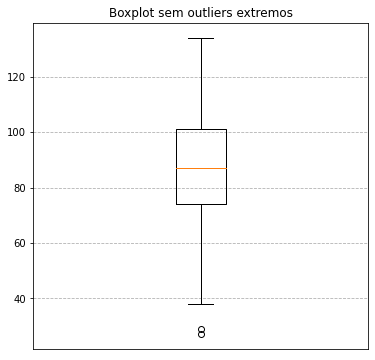

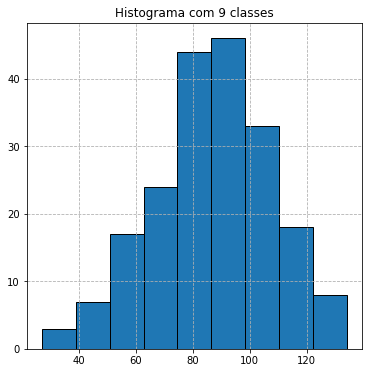

Número de classes: 9
Tamanho do intervalo: 11.88888888888889
Tamanho das classes:  [2, 5, 14, 16, 39, 48, 31, 24, 13, 8]
Intervalos: [27.0, 37.7, 48.4, 59.099999999999994, 69.8, 80.5, 91.19999999999999, 101.89999999999999, 112.6, 123.3, 134.0]


In [9]:
histograma(data_s, True)

Vale ressaltar o número de classes $K$ encontrado pelo cálculo: $$\large\lfloor1+3.3\log_{10}(X)\rceil$$ foi de **9 classes**, onde $X$ é a quantidade de dados observados, que neste caso é 200, sem os *outliers* extremos.

Com o histograma acima, foi determinado que a função de distribuição que melhor representa os dados é a função de **Distribuição normal**, calculado pela função:

$$\Large{\frac{1}{σ\sqrt{2\pi}}e^{\frac{-(x-μ)^2}{2σ^2}}}$$

onde: 

* $σ^2$ é a variância

* $μ$ é a média

---

Determinada a função de distribuição, utilizamos a função KS() para gerar a tabela KS com as colunas:

Valor Observado (V.O.): Coluna de valores presentes na
base de dados ordenados em ordem crescente.

Frequência Abservada (F.O.): Coluna com a frequência de cada dado na base de dados.

Frequência Acumulada Observada (F.A.O.): Coluna com a soma das frequências de cada dado.

Frequência Acumulada Observada Normalizada (F.A.O.N.): Coluna com o resultado da divisão dos dados na F.A.O. pelo número total de dados.

Frequência Teórica Acumulada Normalizada (F.T.A.N.): Coluna com os resultados da aplicação da função de distribuição na coluna V.O.

Valor Absoluto (D): Coluna com os valores resultantes das diferenças entre as colunas F.A.O.N. e F.T.A.N.

In [10]:
pd.set_option('display.max_rows', None)
df = KS(data_s,"normal")
df

,V.O.,F.O.,F.A.O.,F.A.O.N.,F.T.A.N.,D
0,27,1,1,0.005,0.001773,0.003227
1,29,1,2,0.010,0.002419,0.007581
2,38,1,3,0.015,0.008769,0.006231
3,45,1,4,0.020,0.021120,0.001120
4,46,1,5,0.025,0.023740,0.001260
5,47,1,6,0.030,0.026629,0.003371
6,48,1,7,0.035,0.029805,0.005195
7,49,2,9,0.045,0.033289,0.011711
8,50,1,10,0.050,0.037101,0.012899
9,54,4,14,0.070,0.056060,0.013940


Com a tabela gerada, é possível resgatar o dado com maior valor de diferença D na tabela:

In [11]:
D_max_row = df.loc[df['D'] == max(df['D'])]
D_max_row

,V.O.,F.O.,F.A.O.,F.A.O.N.,F.T.A.N.,D
41,89,6,118,0.59,0.552405,0.037595


Para finalizar a análise, é preciso determinar se a distribuição é aderente ao conjunto de dados, comparando o maior valor de D com o valor de D-crítico.

Utilizando a tabela de valores críticos, é possível observar que, com o $\alpha$ = 0.05 e a quantidade de dados $n > 40$, o D-crítico é dado por: $$\large\frac{1.36}{\sqrt{n}}$$

Caso o valor de D-crítico seja maior que o maior valor de D na tabela KS, então a distribuição é aderente ao conjunto de dados.

Realizando o teste de aderência abaixo, temos que a distribuição é de fato aderente ao conjunto de dados.

In [12]:
D_crit = lambda x: 1.36 / np.sqrt(x)
D_max = D_max_row['D'].tolist()[0]

print("D-crítico:", D_crit(len(data_s)))
print("Maior valor de D:", D_max,"\n")

if D_crit(len(data_s)) > D_max:
    print('Como o D-crítico > max(D), então a distribuição é aderente ao conjunto de dados.')
else:
    print('A distribuição não é aderente ao conjunto de dados.')

D-crítico: 0.09616652224137047
Maior valor de D: 0.037595294870595874 

Como o D-crítico > max(D), então a distribuição é aderente ao conjunto de dados.


Também é possível observar esta aderência pela imagem **Teste de Aderência** gerada abaixo, que apresenta os valores das colunas F.A.O.N. como azul e F.T.A.N. como laranja, além de mostrar o índice do dado com o maior valor de diferença D no eixo das abscissas do gráfico.

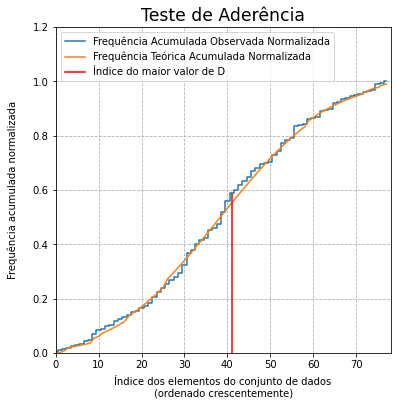

In [13]:
D_max_i = D_max_row.index.tolist()[0]

plt.figure(figsize=(6,6))
plt.title('Teste de Aderência',fontsize='xx-large')
plt.plot(df['F.A.O.N.'], label = 'Frequência Acumulada Observada Normalizada', ds = "steps-mid")
plt.plot(df['F.T.A.N.'], label = 'Frequência Teórica Acumulada Normalizada')
plt.ylabel("Frequência acumulada normalizada", labelpad=15)
plt.xlabel("Índice dos elementos do conjunto de dados\n(ordenado crescentemente)", labelpad=5)
plt.vlines(D_max_i, ymin=0, ymax=D_max_row['F.A.O.N.'], color="red")

plt.plot(0,label = 'Índice do maior valor de D', c="red")

plt.ylim(top=1.2, bottom=0)
plt.xlim(right=len(df),left=0)

plt.grid(linestyle='--')
plt.legend(loc= "upper left")
plt.show()

## Resolução da Questão 2

Realize a modelagem ACD integrada da seguinte descrição de um sistema. Modele levando
em conta apenas o que está descrito. Em seguida, simule utilizando o método das 3 fases com
os dados informados na descrição. (3,5)

Uma biblioteca dispõe de 2 funcionários para atendimento ao público. O tipo de
atendimento que esses funcionários realizam é ouvir o pedido do usuário, buscar
um livro na prateleira, e trazê-lo ao solicitante – essas operações são tratadas como
uma só. Em uma determinada tarde, 6 usuários chegaram a biblioteca nos tempos
3, 5, 7, 7, 9 e 11 respectivamente. Os tempos totais de serviço (conversa + busca + retorno do livro) que cada um desses clientes demandou foi de 5, 2, 2, 4, 2 e 3
respectivamente.

**tempos de chegada: 3, 5, 7, 7, 9 e 11**

**tempos de consulta: 5, 2, 2, 4, 2 e 3**

---

Para a geração da modelagem ACD, foram determinadas como entidades os Funcionários (F1 e F2) e Clientes (C1 até C6).

Para o ciclo de vida de um funcionário: o funcionário deverá estar participando de uma consulta (Atividade) ou estará livre (fila).

Para o ciclo de vida de um Cliente: quando entrar no sistema (fila) irá esperar um funcionário livre para participar de uma consulta (atividade), após a consulta, o cliente irá finalmente sair do sistema (fila).

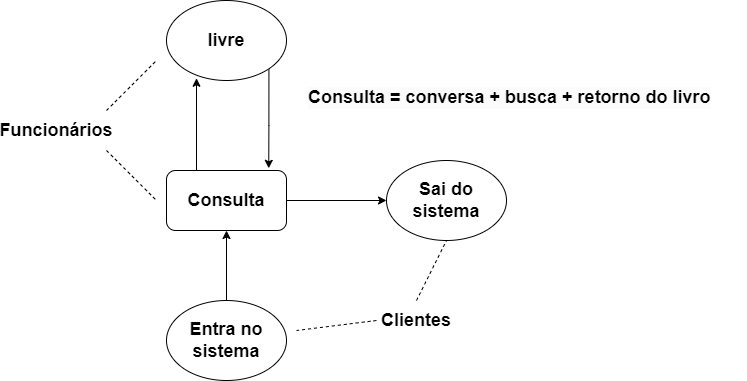

In [14]:
from IPython import display
display.Image("./local-files/ACD_model.png")

Por fim, geramos uma tabela para a apresentação da simulação do modelo ACD acima pelo método das 3 fases. A tabela abaixo apresenta três colunas:

* Tempo: para mostrar o tempo de execução de cada ação

* Fim: para mostrar ações que finalizam em um determinado tempo

* Início: para mostrar ações que iniciam em um determinado tempo

In [15]:
df_excel = pd.read_excel("local-files/sim_results.xlsx")
df_excel

,tempo,fim,início
0,3,X,"entra C1, inicia C1 + F1 e finaliza em 8"
1,5,X,"entra C2, inicia C2 + F2 e finaliza em 7"
2,7,finaliza C2 + F2,"entra C3 e C4, inicia C3 + F2 e finaliza em 9"
3,8,finaliza C1 + F1,inicia C4 + F1 e finaliza em 12
4,9,finaliza C3 + F2,"entra C5, inicia C5 + F2 e finaliza em 11"
5,11,finaliza C5 + F2,"entra C6, inicia C6 + F2 e finaliza em 14"
6,12,finaliza C4 + F1,X
7,14,finaliza C6 + F2,X
